# Parte 1 Infraestrutura

1- Você está rodando em Python 3.9+

2- Você está usando um ambiente virtual: Virtualenv ou Anaconda

3- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

4- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

5- Tire um printscreen do ambiente que será usado rodando em sua máquina.
![Infra](conda_infra_pd.jpg)

6- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

https://github.com/FTNeves80/clusterizacao/blob/main/pd_clusterizacao.ipynb

# Parte 2 Escolha de base de dados

## Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1- Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2- Quantos países existem no dataset?
Total de Países distintos: 167

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Devemos fazer aplicar os seguntes passos:
3.1-Usar só as variáveis numéricas (deixe country/IDs de fora).
3.2-Tratar valores faltantes (ex.: mediana).
3.3-Padronizar as variáveis para a mesma escala (ex.: StandardScaler ou RobustScaler).
3.4- Reduzir assimetria/outliers (ex.: log1p/Yeo-Johnson ou winsorizar).

4- Realize o pré-processamento adequado dos dados.


In [2]:
#PARTE 2.1

import os
import kagglehub
import pandas as pd

# Baixa dataset e retorna o diretório local
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Arquivos salvos em:", path)
print(os.listdir(path))

# Escolhe o CSV principal
csvs = [f for f in os.listdir(path) if f.lower().endswith(".csv")]
file = "Country-data.csv" if "Country-data.csv" in csvs else csvs[0]

# Carrega com pandas
df = pd.read_csv(os.path.join(path, file))


Arquivos salvos em: C:\Users\Dell\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
['Country-data.csv', 'data-dictionary.csv']


In [3]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
print("Dimensão:", df.shape)
print("###################")
df.info()

Dimensão: (167, 10)
###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#PARTE 2.2 
total_paises_distintos = df['country'].nunique()

print("Total de Países distintos:", total_paises_distintos)
#Países distintos: 167

Total de Países distintos: 167


,min,25%,50%,75%,max,mean,std,range,iqr
income,609.0000,3355.000,9960.00,22800.00,125000.00,17144.688623,19278.067698,124391.0000,19445.000
gdpp,231.0000,1330.000,4660.00,14050.00,105000.00,12964.155689,18328.704809,104769.0000,12720.000
child_mort,2.6000,8.250,19.30,62.10,208.00,38.270060,40.328931,205.4000,53.850
exports,0.1090,23.800,35.00,51.35,200.00,41.108976,27.412010,199.8910,27.550
imports,0.0659,30.200,43.30,58.75,174.00,46.890215,24.209589,173.9341,28.550
inflation,-4.2100,1.810,5.39,10.75,104.00,7.781832,10.570704,108.2100,8.940
life_expec,32.1000,65.300,73.10,76.80,82.80,70.555689,8.893172,50.7000,11.500
health,1.8100,4.920,6.32,8.60,17.90,6.815689,2.746837,16.0900,3.680
total_fer,1.1500,1.795,2.41,3.88,7.49,2.947964,1.513848,6.3400,2.085


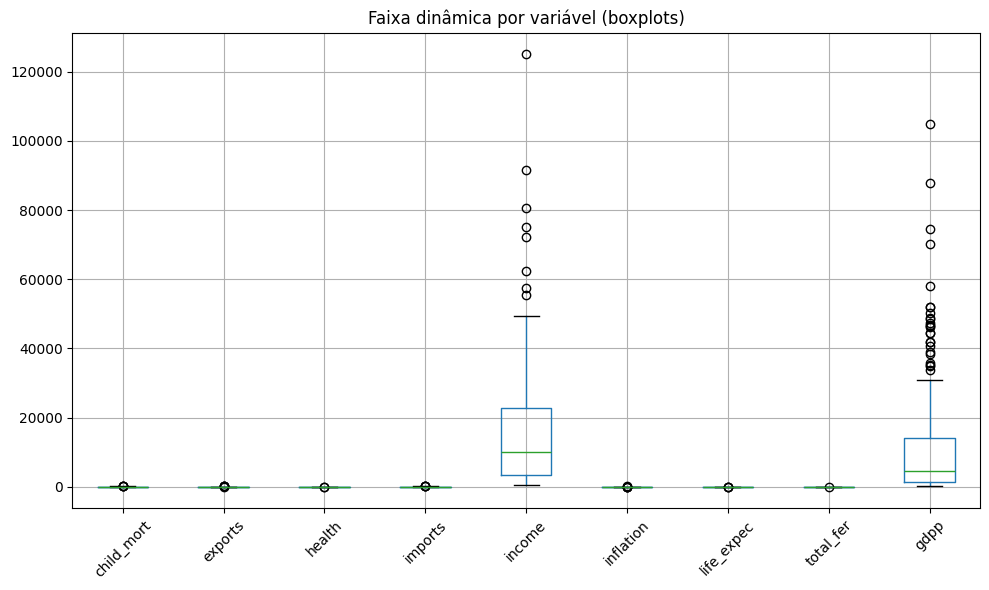

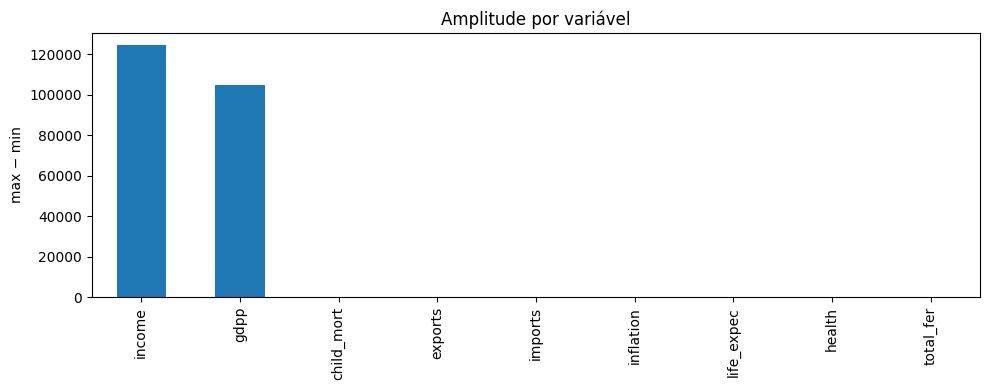

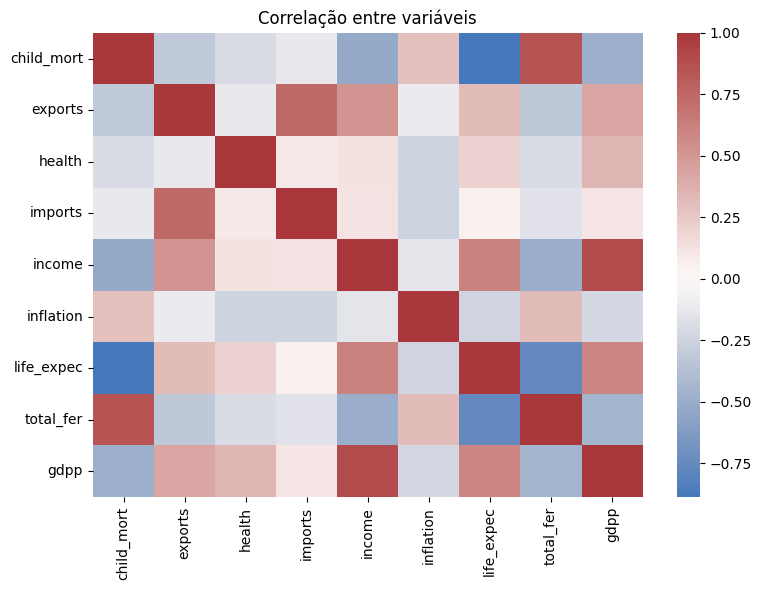

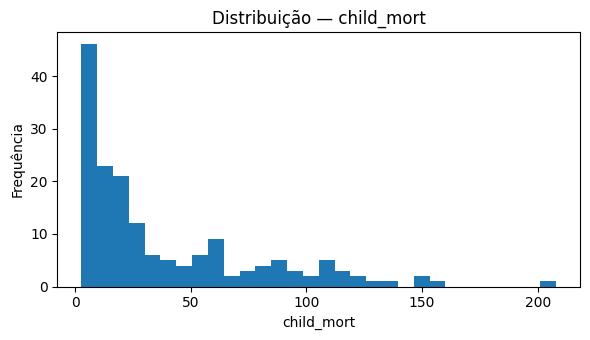

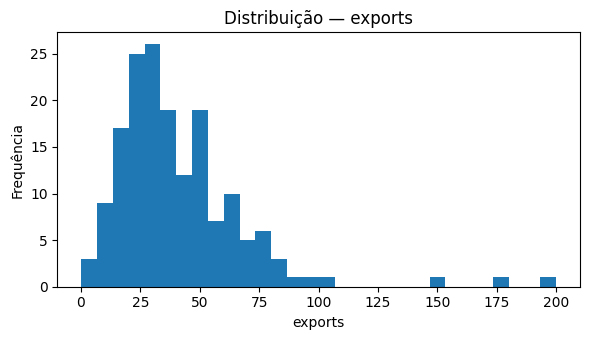

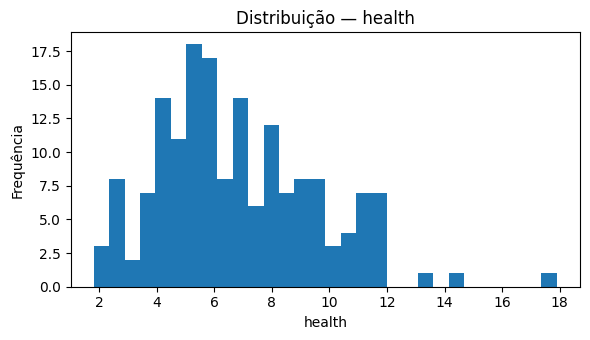

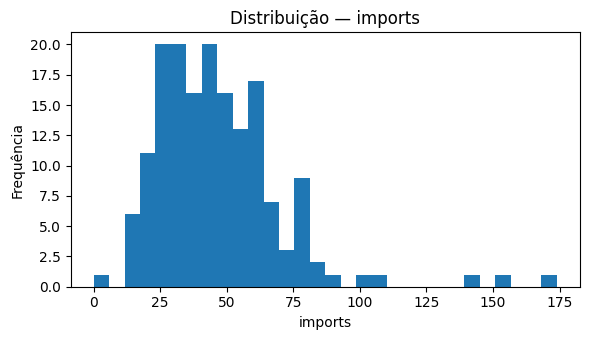

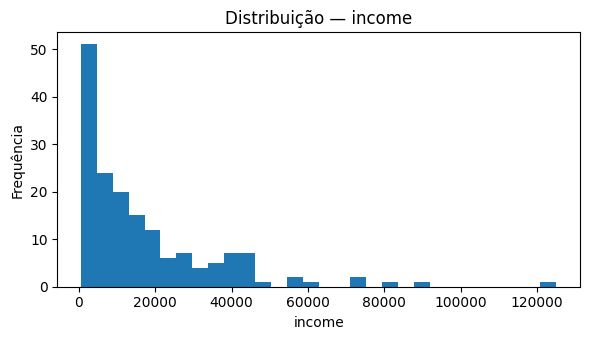

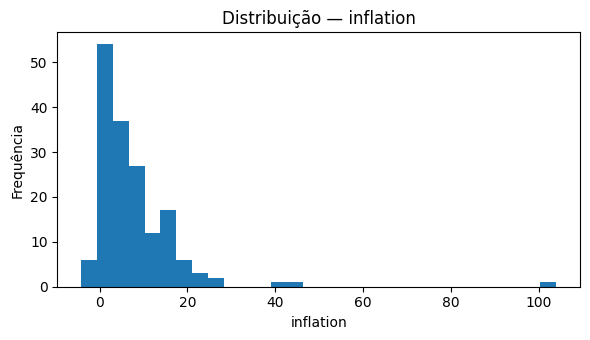

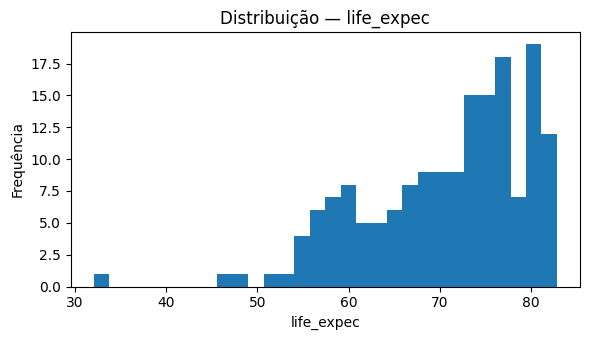

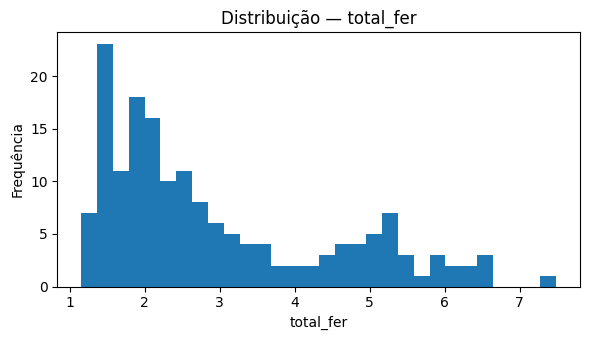

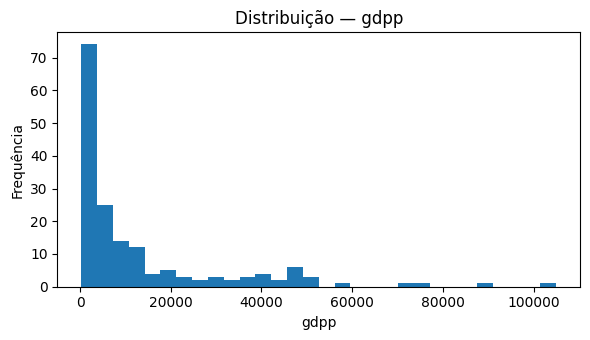

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#Seleciona apenas numéricas 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Estatísticas + amplitude
stats = df[num_cols].describe().T
stats["range"] = stats["max"] - stats["min"]
stats["iqr"]   = stats["75%"] - stats["25%"]
display(stats[["min","25%","50%","75%","max","mean","std","range","iqr"]].sort_values("range", ascending=False))

# Boxplots
plt.figure(figsize=(10,6))
df[num_cols].boxplot(rot=45)
plt.title("Faixa dinâmica por variável (boxplots)")
plt.tight_layout(); plt.show()

# Amplitude (max - min)
(df[num_cols].max() - df[num_cols].min()).sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Amplitude por variável"); plt.ylabel("max − min"); plt.tight_layout(); plt.show()


# Correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap="vlag", center=0, annot=False)
plt.title("Correlação entre variáveis"); plt.tight_layout(); plt.show()

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribuição — {col}"); plt.xlabel(col); plt.ylabel("Frequência"); plt.tight_layout(); plt.show()



In [7]:
# PARERAS 2 
# 4- Realize o pré-processamento adequado dos dados.

from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1) Selecionar apenas variáveis numéricas
num_cols = df.select_dtypes(include='number').columns
X = df[num_cols].copy()

# 2) Escalonar (padronizar) — adequado para K-Means/Hierárquica
X_ready = StandardScaler().fit_transform(X)

# 3) (Opcional) DataFrame com nomes de colunas para análises/plots
X_ready_df = pd.DataFrame(X_ready, columns=num_cols, index=df.index)

print("Dimensão dos dados pré-processados:", X_ready_df.shape)


Dimensão dos dados pré-processados: (167, 9)


In [8]:
X_ready_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Parte 3 Clusterização

## Para os dados pré-processados da etapa anterior você irá:

1.Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    1.1 K-Médias
    1.2 Clusterização Hierárquica

### 2.Para os resultados, do K-Médias:
    2.1Interprete cada um dos clusters obtidos citando:
        Qual a distribuição das dimensões em cada grupo
        O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

## Resposta
Cluster 0 alto desenvolvimento
Distribuição: gdpp e income altos; child_mort e total_fer baixos; life_expec alta; inflação baixa a moderada; participações de exports/imports/health em torno de níveis médios.
País representativo: Austrália (ou Áustria) fica mais próximo do centróide por combinar alto PIB per capita, alta expectativa de vida e baixas mortalidade infantil e fertilidade no espaço padronizado.

Cluster 1 baixo desenvolvimento
Distribuição: gdpp e income baixos; child_mort e total_fer altos; life_expec baixa; inflação mais elevada.
País representativo: Afeganistão (ou Angola) perfis com alta mortalidade infantil, alta fertilidade e baixo PIB per capita, próximos ao centróide desse grupo.

Cluster 2 intermediário / em transição
Distribuição: variáveis em faixas medianas; child_mort/total_fer moderados; life_expec média/alta; inflação e comércio exterior variando entre baixo e médio.
País representativo: Albânia (ou Argentina/Argélia) combina valores medianos nas principais dimensões, ficando próximo ao centróide.

### 3.Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

## Resposta

Cluster A (alto desenvolvimento): países que se unem apenas em altas distâncias (folhas se juntam tarde), indicando grande semelhança interna e forte separação dos demais. Perfil típico: gdpp/income altos, child_mort/total_fer baixos, life_expec alta, inflação baixa a moderada.

Cluster B (baixo desenvolvimento): ramos que se unem cedo e ficam distantes do grupo A; perfil oposto: PIB/ renda baixos, mortalidade infantil e fertilidade altas, expectativa de vida baixa, inflação mais elevada.

Cluster C (intermediário / transição): fusões em distâncias intermediárias, valores medianos nas principais dimensões; mistura países em desenvolvimento com indicadores intermediários e alguma variabilidade em exports/imports/health.


### 4.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

## Resposta


Semelhanças

Com os dados padronizados, ambos os métodos identificam três blocos naturais: alto desenvolvimento, intermediário e baixo.

Os núcleos dos grupos são consistentes: países “típicos” permanecem no mesmo cluster em ambos os métodos (alto acordo global: 83,2%).

Diferenças

K-Means: produz partições mais esféricas e balanceadas (tamanhos: 36/47/84) e é sensível a outliers e à inicialização.

Hierárquica (Ward): constrói estrutura em níveis (dendrograma), é determinística e evidencia saltos de distância, resultou em clusters mais desbalanceados (tamanhos: 34/27/106), com absorção de casos de fronteira pelo maior grupo.

Migrações observadas: 1→2 (20 países), 0→2 (5) e 2→0 (3), indicando deslocamentos principalmente de países intermediários para o grande cluster da hierárquica.

Interpretação

O dendrograma mostra um grande salto final, sugerindo forte separação de um grupo (alto desenvolvimento), o que o K-Means também captou como um cluster coeso.

As discrepâncias concentram-se em casos de fronteira: a hierárquica tende a aglomerar por proximidade local e a fundir esses casos ao maior bloco; o K-Means os aloca pela proximidade ao centróide global.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# matriz padronizada
X_input = X_ready_df.values  

kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_input)

# guardar para uso nos próximos itens
df_km = df.copy()
df_km["cluster_km"] = labels
centroids = kmeans.cluster_centers_  

# resumo
print("Tamanho dos clusters:")
print(pd.Series(labels, name="cluster").value_counts().sort_index())

print("Silhouette:", round(silhouette_score(X_input, labels), 3))


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 79: invalid continuation byte
c:\Users\Dell\anaconda3\envs\clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a me

Tamanho dos clusters:
cluster
0    36
1    47
2    84
Name: count, dtype: int64
Silhouette: 0.283


In [12]:
df_km.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


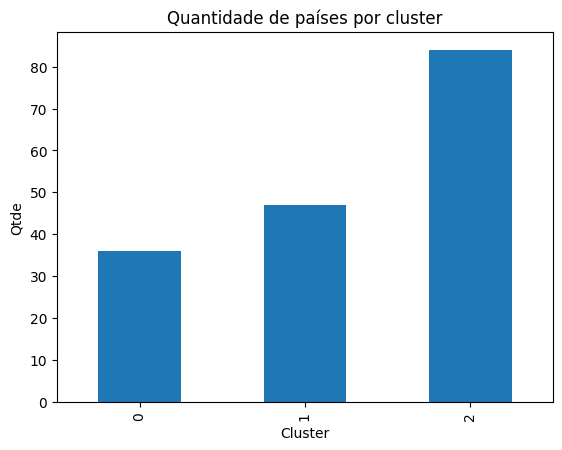

In [13]:
df_km["cluster_km"].value_counts().sort_index().plot(kind="bar")
plt.title("Quantidade de países por cluster"); plt.xlabel("Cluster"); plt.ylabel("Qtde"); plt.show()


In [ ]:

import plotly.express as px

fig = px.choropleth(
    df_km, 
    locations="country",                
    locationmode="country names",       
    color="cluster_km",                 
    title="Países por cluster (K-Means, k=3)"
)
fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23296\2278744444.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



![Mapa](Mapa_Keans_cluter3.jpg)

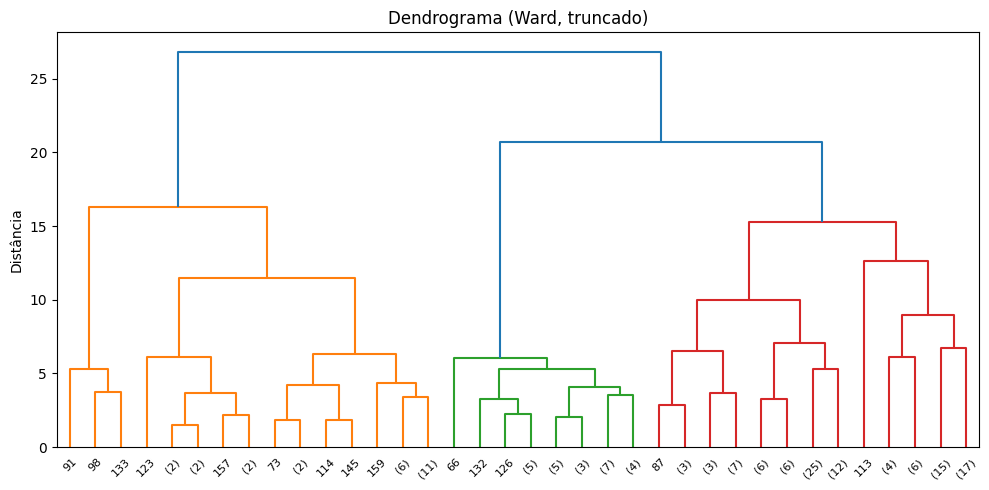

Tamanho dos grupos (HC):
cluster_hc
0     34
1     27
2    106
Name: count, dtype: int64


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd

#matriz padronizada
X_input = X_ready_df.values  

# Distância Euclidiana
Z = linkage(X_input, method='ward')

# Dendrograma (truncado p/ não poluir)
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrograma (Ward, truncado)')
plt.ylabel('Distância')
plt.tight_layout()
plt.show()

# Cortar a árvore em 3 clusters
labels_hc = fcluster(Z, t=3, criterion='maxclust') - 1  # 0..2


df_hc = df.copy()
df_hc['cluster_hc'] = labels_hc
print("Tamanho dos grupos (HC):")
print(df_hc['cluster_hc'].value_counts().sort_index())


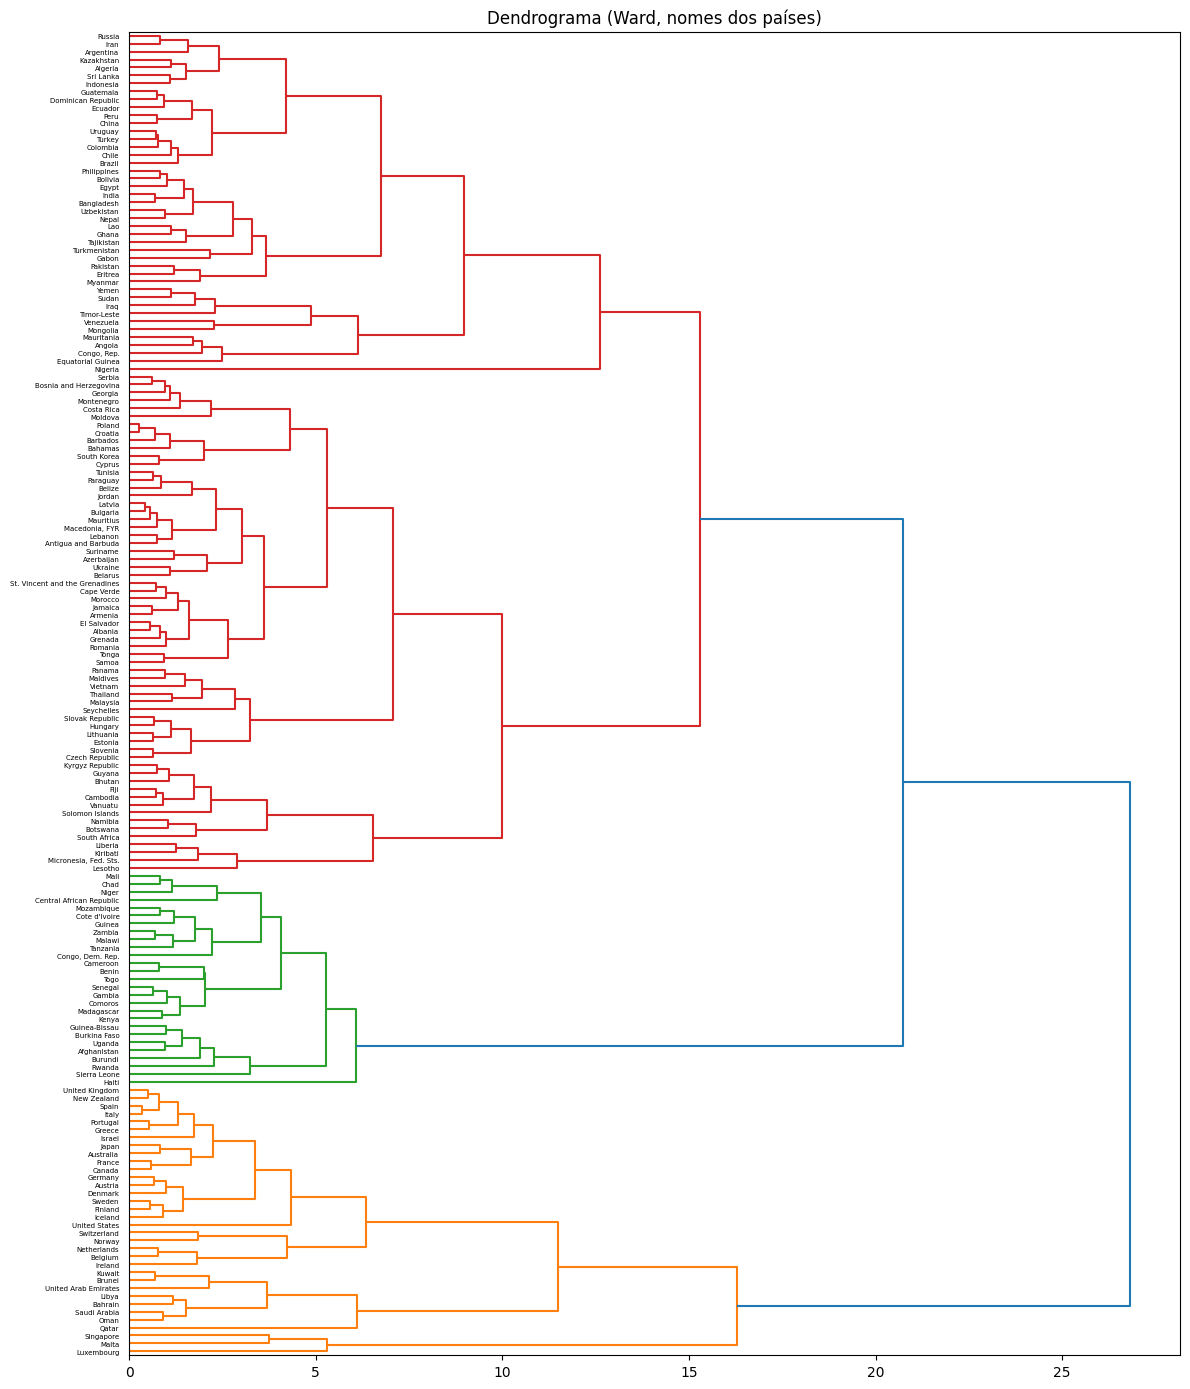

In [17]:
plt.figure(figsize=(12, 14))
dendrogram(
    Z,
    labels=df['country'].tolist(),   # nomes nos galhos
    orientation='right',             # melhora a leitura
)
plt.title('Dendrograma (Ward, nomes dos países)')
plt.tight_layout()
plt.show()

In [21]:
# Comparação dos dois métodos

# (1) Contagens por método
print("\nContagem K-Means:")
display(cmp['km'].value_counts().sort_index().to_frame('km_count'))

print("\nContagem Hierárquica:")
display(cmp['hc'].value_counts().sort_index().to_frame('hc_count'))

# (1.b) Tabela de contingência (km x hc)
print("\nCrosstab (K-Means x Hierárquica):")
display(pd.crosstab(cmp['km'], cmp['hc']))




Contagem K-Means:


,km_count
km,
0,36
1,47
2,84



Contagem Hierárquica:


,hc_count
hc,
0,34
1,27
2,106



Crosstab (K-Means x Hierárquica):


hc,0,1,2
km,,,
0,31,0,5
1,0,27,20
2,3,0,81


# Parte 4 Escolha de algoritmos

Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
## Resposta 
Etapas do K-médias até a convergência
1-Inicialização: escolher 𝑘

2-centróides iniciais.

3-Atribuição: cada ponto vai para o cluster do centróide mais próximo (distância Euclidiana).

4-Atualização: recalcular cada centróide como a média dos pontos do cluster.

5-Critério de parada: parar quando rótulos não mudam ou o deslocamento dos centróides ficar abaixo de um limiar.

O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). 
Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. 
Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

## Resposta
1-Versão pedida com “medóide” (ponto real mais próximo do baricentro)

2-Atribuição: igual ao K-médias, usando o representante do cluster.

3-Atualização: para cada cluster, calcular o baricentro e escolher como representante o ponto da base mais próximo desse baricentro (o medóide).

4-Parada: quando nem rótulos nem representantes (medóides) mudarem entre iterações.


O algoritmo de K-médias é sensível a outliers nos dados. Explique.
## Resposta 
O centróide é a média: valores extremos puxam a média, deslocando o centróide, mudando fronteiras e piorando a coerência interna dos clusters (especialmente com distância Euclidiana).

Por que o algoritmo de DBScan é mais robusto à presença de outliers?
## Resposta
O DBSCAN agrupa por densidade e rotula pontos isolados como ruído:
Regras locais (eps, min_samples) ponto sem vizinhos suficientes não inicia/expande cluster.
Sem centróides outliers não deslocam “centros” como no k-means.
Efeito não-propagado um ponto isolado não contamina o cluster.
Logo, outliers distantes não são considerados, mantendo o agrupamento mais robusto.

## Novo algoritmo calculado pelo medóide.

In [ ]:
import numpy as np

def kmeans_medoide_rep(X, k=3, max_iter=100, tol=1e-4, random_state=42):
    rng = np.random.default_rng(random_state)
    n = X.shape[0]
    # inicia representantes (medoides) como índices aleatórios
    medoid_idx = rng.choice(n, size=k, replace=False)
    reps = X[medoid_idx]
    labels = np.full(n, -1)

    for _ in range(max_iter):
        # atribuição ao representante mais próximo
        dists = np.linalg.norm(X[:, None, :] - reps[None, :, :], axis=2)  # [n,k]
        new_labels = np.argmin(dists, axis=1)

        # calcula centróides por cluster
        centroids = np.zeros((k, X.shape[1]))
        for j in range(k):
            mask = (new_labels == j)
            if mask.any():
                centroids[j] = X[mask].mean(axis=0)
            else:
                # cluster vazio: re-semente com ponto mais distante do seu rep atual
                far_idx = np.argmax(np.min(dists, axis=1))
                centroids[j] = X[far_idx]

        # 3) atualiza representantes: ponto real mais próximo do centróide (medóide)
        new_medoid_idx = medoid_idx.copy()
        new_reps = reps.copy()
        for j in range(k):
            mask = (new_labels == j)
            if mask.any():
                idxs = np.where(mask)[0]
                dcent = np.linalg.norm(X[idxs] - centroids[j], axis=1)
                m_local = np.argmin(dcent)
                new_medoid_idx[j] = idxs[m_local]
                new_reps[j] = X[new_medoid_idx[j]]

        # 4) critério de parada: rótulos e reps estáveis
        rep_shift = np.linalg.norm(new_reps - reps)
        if np.array_equal(new_labels, labels) and rep_shift <= tol:
            labels = new_labels
            medoid_idx = new_medoid_idx
            reps = new_reps
            break

        labels = new_labels
        medoid_idx = new_medoid_idx
        reps = new_reps

    return labels, centroids, medoid_idx, reps

# Executa
labels_med, centroids_med, medoid_idx, reps = kmeans_medoide_rep(X_input, k=3, random_state=42)

# País "representante" (medóide) de cada cluster
medoid_countries = df.iloc[medoid_idx]['country'].tolist()
print("Medóides (países):", medoid_countries)


Medóides (países): ['Ghana', 'Tunisia', 'Iceland']
